In [167]:
from reader import load_dataframe
import pandas as pd
import numpy as np
import os
import glob
from datetime import date, datetime
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import requests
import math
import matplotlib.ticker as mtick

plot_colors=["#9b59b6", "#3498db", "#95a5a6", "#e74c3c", "#34495e", "#2ecc71", '#ffce44']

In [2]:
# df = load_dataframe()
df = pd.read_csv('ny_sf_all_data_0703.csv', parse_dates=[1,2])
df.sample(5)

,city,bikeid,starttime,stoptime,tripduration,start station name,start station latitude,start station longitude,end station name,end station latitude,end station longitude,usertype,birth year,gender,age
65601,New York,29586,2018-04-27 08:22:18,2018-04-27 08:28:13,355,Leonard Gordon Park,40.745910,-74.057271,Journal Square,40.733670,-74.062500,Subscriber,1972.0,Male,46.0
32586,New York,29525,2018-03-11 13:48:06,2018-03-11 14:04:49,1003,Exchange Place,40.716247,-74.033459,Christ Hospital,40.734786,-74.050444,Subscriber,1963.0,Male,55.0
73493,New York,33650,2018-05-04 22:53:10,2018-05-04 22:56:39,209,Grove St PATH,40.719586,-74.043117,Jersey & 6th St,40.725289,-74.045572,Subscriber,1969.0,Female,49.0
23652,New York,31870,2018-02-22 09:22:49,2018-02-22 09:25:28,159,Marin Light Rail,40.714584,-74.042817,Grove St PATH,40.719586,-74.043117,Subscriber,1986.0,Male,32.0
53106,New York,29662,2018-04-13 06:52:42,2018-04-13 06:54:30,108,Newport Pkwy,40.728745,-74.032108,Newport PATH,40.727224,-74.033759,Subscriber,1978.0,Female,40.0


In [3]:
#convert start time to hour decimal to graph
# df['start hour'] = df['starttime'].apply(lambda x: x.hour + (x.minute/60))
df['start hour'] = df['starttime'].apply(lambda x: x.hour + (round((x.minute/60)*4))/4) #rounds to quarter hour
# df['age'] = df['age'].fillna('Other')
df.head()

,city,bikeid,starttime,stoptime,tripduration,start station name,start station latitude,start station longitude,end station name,end station latitude,end station longitude,usertype,birth year,gender,age,start hour
0,New York,29590,2018-01-01 00:01:46,2018-01-01 00:03:58,132,Grove St PATH,40.719586,-74.043117,Newark Ave,40.721525,-74.046305,Subscriber,1964.0,Male,54.0,0.0
1,New York,29613,2018-01-01 01:27:17,2018-01-01 01:36:38,560,Marin Light Rail,40.714584,-74.042817,Brunswick & 6th,40.726012,-74.050389,Subscriber,1989.0,Female,29.0,1.5
2,New York,31940,2018-01-01 01:29:03,2018-01-01 01:33:58,294,Sip Ave,40.730743,-74.063784,Baldwin at Montgomery,40.723659,-74.064194,Subscriber,1994.0,Male,24.0,1.5
3,New York,31949,2018-01-01 01:59:32,2018-01-01 02:02:49,197,Newark Ave,40.721525,-74.046305,Monmouth and 6th,40.725685,-74.048790,Subscriber,1964.0,Male,54.0,2.0
4,New York,31929,2018-01-01 02:06:18,2018-01-01 02:21:50,932,Exchange Place,40.716247,-74.033459,Newport Pkwy,40.728745,-74.032108,Subscriber,1992.0,Male,26.0,2.0


In [4]:
#age grouping
age_bins = [0, 20, 30, 40, 50, 60, 100]
age_groups = ['0-20', '21-30', '31-40', '41-50', '51-60', '61+']
df['age groups'] = pd.cut(df['age'], age_bins, labels=age_groups)
df.sample(5)

,city,bikeid,starttime,stoptime,tripduration,start station name,start station latitude,start station longitude,end station name,end station latitude,end station longitude,usertype,birth year,gender,age,start hour,age groups
584816,San Francisco,1384,2018-05-09 07:31:56.541,2018-05-09 07:34:24.4420,147,Market St at Franklin St,37.773793,-122.421239,Market St at 10th St,37.776619,-122.417385,Subscriber,1966.0,Male,52.0,7.50,51-60
608472,San Francisco,3779,2018-05-04 13:50:22.420,2018-05-04 14:04:41.6080,859,Market St at 10th St,37.776619,-122.417385,2nd St at Folsom St,37.785000,-122.395936,Customer,1983.0,Male,35.0,13.75,31-40
79601,New York,29628,2018-05-10 06:26:45.000,2018-05-10 06:37:59,673,Christ Hospital,40.734786,-74.050444,City Hall,40.717732,-74.043845,Subscriber,1992.0,Male,26.0,6.50,21-30
96397,New York,33657,2018-05-25 20:11:11.000,2018-05-25 20:14:28,197,Jersey & 3rd,40.723332,-74.045953,Hamilton Park,40.727596,-74.044247,Subscriber,1981.0,Male,37.0,20.25,31-40
221372,San Francisco,277,2018-03-29 09:10:05.639,2018-03-29 09:21:27.0610,681,Raymond Kimbell Playground,37.783813,-122.434559,Powell St BART Station (Market St at 5th St),37.783899,-122.408445,Subscriber,1988.0,Male,30.0,9.25,21-30


### age groups, average age

In [5]:
df.groupby('age groups').agg(['count', 'median'])['start hour']

,count,median
age groups,,
0-20,6438,15.50
21-30,191800,15.25
31-40,225662,14.75
41-50,98158,14.25
51-60,49854,13.75
61+,15500,13.75


In [6]:
#create data frame for each city
grouped = df.groupby('city')
ny = grouped.get_group('New York')
sf = grouped.get_group('San Francisco')

In [7]:
avg_age = df['age'].mean()
sf_avg_age = sf['age'].mean()
ny_avg_age = ny['age'].mean()
print('the overall average age is: {}'.format(avg_age))
print('the average age in New York is: {}'.format(ny_avg_age))
print('the average age in San Francisco is: {}'.format(sf_avg_age))

the overall average age is: 36.36047789302517
the average age in New York is: 38.046535888886616
the average age in San Francisco is: 36.02414004162076


In [8]:
age_group_count = df.groupby('city')['age groups'].value_counts()
age_group_count = pd.DataFrame([age_group_count]).transpose()
age_group_count
# ny_age = ny['age groups'].value_counts().sort_index()
# sf_age = sf['age groups'].value_counts().sort_index()
# print(ny_age)
# print(sf_age)


age groups
city          age groups            
New York      31-40            41019
              21-30            25522
              41-50            17846
              51-60             9376
              61+               3837
              0-20               124
San Francisco 31-40           184643
              21-30           166278
              41-50            80312
              51-60            40478
              61+              11663
              0-20              6314

In [9]:
#NEED TO GRAPH AGE GROUPS

# plt.figure(figsize=(10,8))
# age_group_count.plot(kind='bar')
# # sf_plt = plt.bar(sf_age['index'], sf_age['age groups'])
# # ny_plt = plt.bar(ny_age['index'], ny_age['age groups'])

# plt.title('Bike Users by Age', fontsize=18)
# plt.xlabel("Age Group", fontsize = 14)
# plt.ylabel("Number of Users", fontsize = 14)
# # plt.xticks(np.arange(6),('0-20', '21-30','31-40','41-50','51-60', '61+'))
# plt.xticks(np.arange(6), age_groups)
# plt.show()

### count by age group, by city

In [10]:
#NY age group breakdown
try:
    ny_age_group = ny.groupby('age groups').count()['usertype'].reset_index()
except KeyError:
    pass
ny_age_group

,age groups,usertype
0,0-20,124
1,21-30,25522
2,31-40,41019
3,41-50,17846
4,51-60,9376
5,61+,3837


In [11]:
#SF age group break down
try:
    sf_age_group = sf.groupby('age groups').count()['usertype'].reset_index()
except KeyError:
    pass
sf_age_group

,age groups,usertype
0,0-20,6314
1,21-30,166278
2,31-40,184643
3,41-50,80312
4,51-60,40478
5,61+,11663


In [185]:
ny_age_gender = ny.groupby(['age groups', 'gender']).gender.count().unstack().fillna(0)
ny_age_gender =ny_age_gender.drop(['Unknown'], axis =1).reset_index()
ny_age_gender = ny_age_gender[['age groups', 'Male', 'Female']]
ny_age_gender


gender,age groups,Male,Female
0,0-20,97.0,27.0
1,21-30,19539.0,5958.0
2,31-40,31899.0,8608.0
3,41-50,14409.0,3296.0
4,51-60,7915.0,1461.0
5,61+,3065.0,771.0


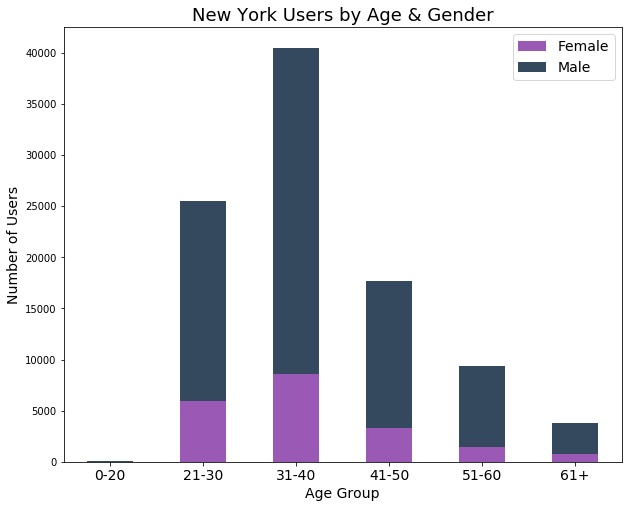

In [13]:
# age group break down by gender NY
plot_colors=['#9b59b6', '#34495e', '#95a5a6']
ny_age_gender.plot(kind='bar', color =plot_colors, stacked=True, figsize=(10,8))
plt.legend(fontsize=14)
plt.title('New York Users by Age & Gender', fontsize=18)
plt.xlabel("Age Group", fontsize = 14)
plt.ylabel("Number of Users", fontsize = 14)
plt.xticks(np.arange(6),('0-20', '21-30','31-40','41-50','51-60', '61+'), fontsize= 14, rotation =0)
plt.show()

In [14]:
sf_age_gender = sf.groupby(['age groups', 'gender']).gender.count().unstack().fillna(0)
sf_age_gender =sf_age_gender.drop(['Other'], axis =1).reset_index()
sf_age_gender

gender,age groups,Female,Male
0,0-20,1595,4694
1,21-30,48292,115762
2,31-40,45198,136400
3,41-50,16066,63078
4,51-60,8818,31093
5,61+,2079,9509


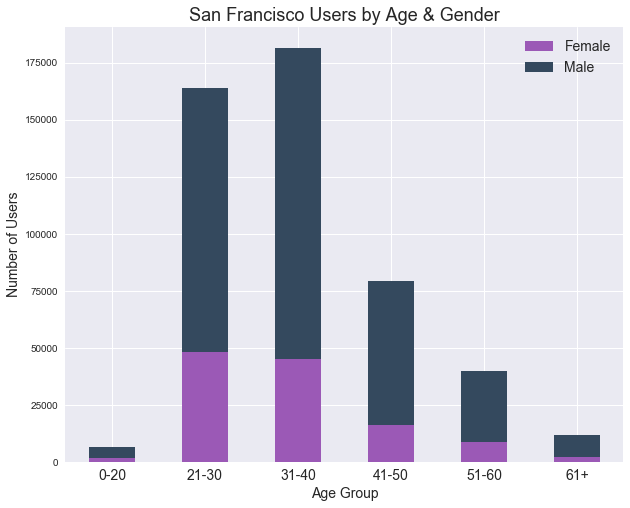

In [164]:
# age group break down by gender SF
plot_colors=['#9b59b6', '#34495e', '#95a5a6']
sf_age_gender.plot(kind='bar', color =plot_colors, stacked=True, figsize=(10,8))
plt.legend(fontsize=14)
plt.title('San Francisco Users by Age & Gender', fontsize=18)
plt.xlabel("Age Group", fontsize = 14)
plt.ylabel("Number of Users", fontsize = 14)
plt.xticks(np.arange(6),('0-20', '21-30','31-40','41-50','51-60', '61+'), fontsize= 14, rotation =0)
plt.show()

In [16]:
#NewYork user count by age group
plt.figure(figsize=(10,8))
plt.bar(ny_age_group['age groups'], ny_age_group['city'], color='#34495e', align="center")
plt.title("New York Bike Users, By Age", fontsize = 18)
plt.xlabel("Age Group", fontsize = 14)
plt.ylabel("Number of Users", fontsize = 14)

KeyError: 'city'

In [ ]:
#SanFran user count by age group
plt.figure(figsize=(10,8))
plt.bar(sf_age_group['age groups'], sf_age_group['usertype'], color='#9b59b6', align="center")
plt.title("San Francisco Bike Users, By Age", fontsize = 18)
plt.xlabel("Age Group", fontsize = 14)
plt.ylabel("Number of Users", fontsize = 14)

### time of day by age

In [ ]:
df['start date'], df['start time'] = df['starttime'].str.split(' ',1).str
df['end date'], df['end time'] = df['stoptime'].str.split(' ', 1).str
# df.drop(['starttime', 'stoptime'], axis = 1)
df.head()

In [ ]:
sf['tripduration'].hist(bins=100)

In [ ]:
sf.groupby('age groups').count()

In [182]:
zero = sf[sf['age groups'] == '0-20']
twenty1= sf[sf['age groups'] == '31-40' ]
forty1 = sf[sf['age groups'] == '41-50' ]
fifty1 = sf[sf['age groups'] == '51-60' ]
sixty1 = sf[sf['age groups'] == '61+' ] 
thirty1 = sf[sf['age groups'] == '21-30' ]

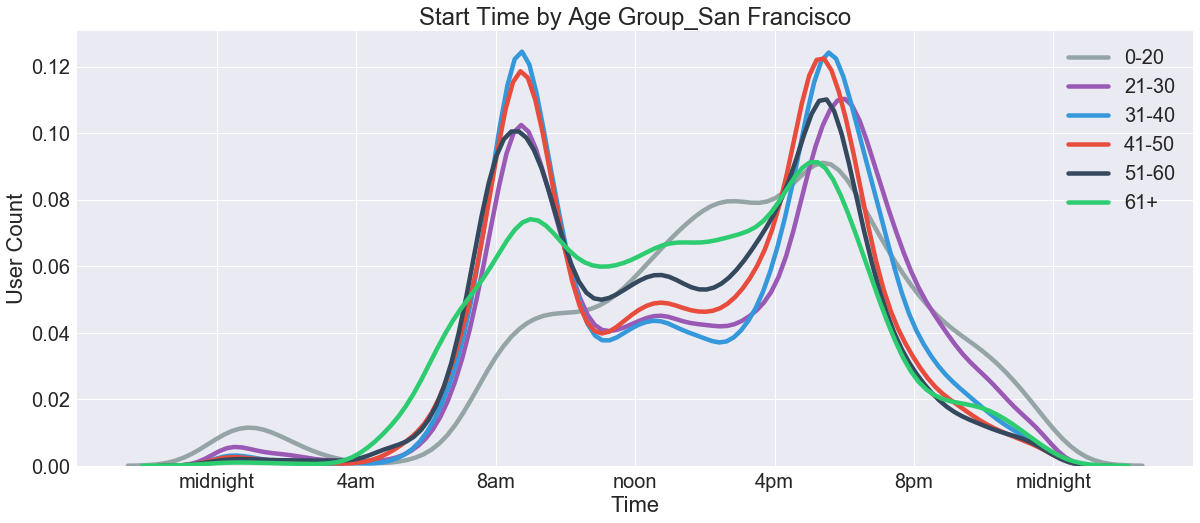

In [181]:
plt.figure(figsize=(20,8))
sns.set(rc={'lines.linewidth':4.5}, font_scale=2)
sns.distplot(zero['start hour'], hist=False, color ='#95a5a6', label = '0-20')
sns.distplot(twenty1['start hour'], hist=False, color ='#9b59b6', label = '21-30')
sns.distplot(thirty1['start hour'], hist=False, color = '#3498db', label = '31-40')
sns.distplot(forty1['start hour'], hist=False, color = '#e74c3c',label = '41-50')
sns.distplot(fifty1['start hour'], hist=False, color = '#34495e',label = '51-60')
sns.distplot(sixty1['start hour'], hist=False, color = '#2ecc71',label = '61+')
plt.legend()
plt.title("Start Time by Age Group_San Francisco")
plt.xlabel("Time")
plt.xticks(np.arange(0, 25, step=4), ('midnight', '4am', '8am', 'noon', '4pm', '8pm', 'midnight'))
plt.ylabel("User Count")
plt.show()


### percent users by city & age group

In [19]:
#SanFran
sf_total_riders = sf['usertype'].count()
print('total number of users in SanFran is: {}'.format(sf_total_riders))

sf_age_group['age group percent'] = sf_age_group['usertype'].map(lambda x: (x/sf_total_riders)*100)

sf_age_group['age group percent'] = sf_age_group['age group percent'].map('{0:.2f}%'.format) 

#export to excel to handle "other" category for non-reporting
sf_age_group.to_clipboard(excel=True)
sf_age_group_df = pd.read_csv('sf_age_group_df.csv')
sf_age_group_df


total number of users in SanFran is: 528394


,age groups,usertype,age group percent
0,0-20,6314,1.19%
1,21-30,166278,31.47%
2,31-40,184643,34.94%
3,41-50,80312,15.20%
4,51-60,40478,7.66%
5,61+,11663,2.21%
6,other,38706,7.33%


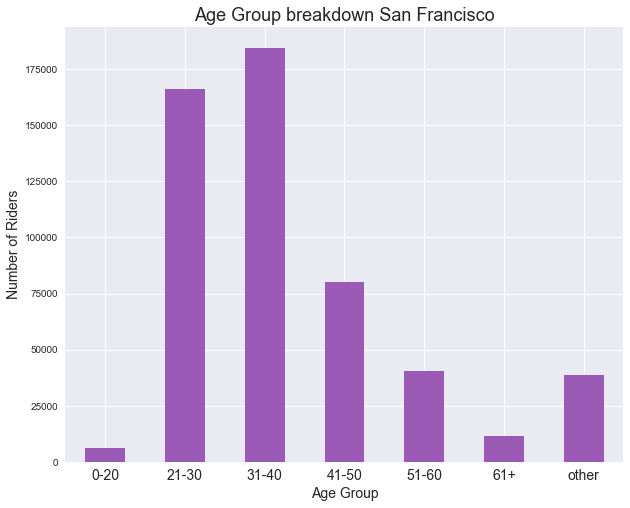

In [76]:
sns.set()
sf_age_group_df.plot(kind='bar', color = plot_colors, figsize=(10,8), legend=False)
plt.title('Age Group breakdown San Francisco', fontsize=18)
plt.xlabel("Age Group", fontsize = 14)
plt.ylabel("Number of Riders", fontsize = 14)
plt.xticks(np.arange(7),('0-20', '21-30','31-40','41-50','51-60', '61+', 'other'), fontsize= 14, rotation=0)
plt.show()

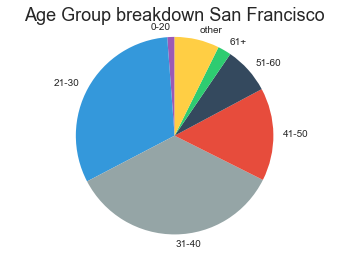

In [218]:
sns.set()

age_0 = float(sf_age_group_df.iloc[0]['usertype'])
age_21 = sf_age_group_df.iloc[1]['usertype']
age_31 = sf_age_group_df.iloc[2]['usertype']
age_41 = sf_age_group_df.iloc[3]['usertype']
age_51 = sf_age_group_df.iloc[4]['usertype']
age_61 = sf_age_group_df.iloc[5]['usertype']
age_other = sf_age_group_df.iloc[6]['usertype']

colors = plot_colors
labels = '0-20', '21-30','31-40','41-50','51-60', '61+', 'other'
ages = [age_0, age_21, age_31, age_41, age_51, age_61, age_other]


plt.pie(ages, labels=labels, colors=plot_colors, startangle=90)
plt.title('Age Group breakdown San Francisco', fontsize=18)
plt.axis('equal')
plt.show()

In [22]:
#NewYork
ny_total_riders = ny['usertype'].count()
print('total number of users in New York is: {}'.format(ny_total_riders))

ny_age_group['age group percent'] = ny_age_group['usertype'].map(lambda x: (x/ny_total_riders)*100)

ny_age_group['age group percent'] = ny_age_group['age group percent'].map('{0:.2f}%'.format) 

#export to excel to handle "other" category for non-reporting
ny_age_group.to_clipboard(excel=True)
ny_age_group_df = pd.read_csv('ny_age_group_df.csv')
ny_age_group_df


total number of users in New York is: 102979


,age groups,usertype,age group percent
0,0-20,124,0.12%
1,21-30,25522,24.78%
2,31-40,41019,39.83%
3,41-50,17846,17.33%
4,51-60,9376,9.10%
5,61+,3837,3.73%
6,other,5255,5.11%


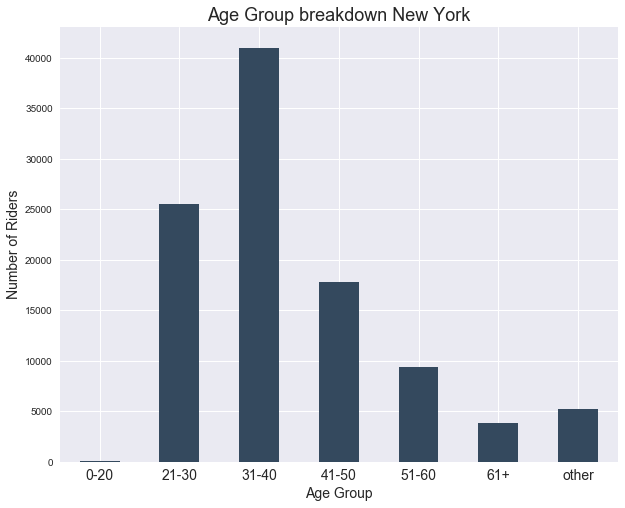

In [23]:
sns.set()
ny_age_group_df.plot(kind='bar', color = '#34495e', figsize=(10,8), legend=False)
plt.title('Age Group breakdown New York', fontsize=18)
plt.xlabel("Age Group", fontsize = 14)
plt.ylabel("Number of Riders", fontsize = 14)
plt.xticks(np.arange(7),('0-20', '21-30','31-40','41-50','51-60', '61+', 'other'), fontsize= 14,rotation=0)
plt.show()

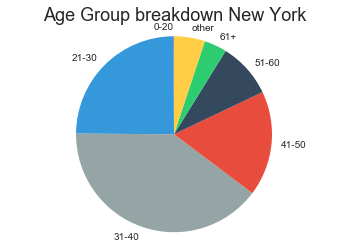

In [78]:
sns.set()

age_0 = float(ny_age_group_df.iloc[0]['usertype'])
age_21 = ny_age_group_df.iloc[1]['usertype']
age_31 = ny_age_group_df.iloc[2]['usertype']
age_41 = ny_age_group_df.iloc[3]['usertype']
age_51 = ny_age_group_df.iloc[4]['usertype']
age_61 = ny_age_group_df.iloc[5]['usertype']
age_other = ny_age_group_df.iloc[6]['usertype']

colors = plot_colors
labels = '0-20', '21-30','31-40','41-50','51-60', '61+', 'other'
ages = [age_0, age_21, age_31, age_41, age_51, age_61, age_other]


plt.pie(ages, labels=labels, colors=plot_colors, startangle=90)
plt.title('Age Group breakdown New York', fontsize=18)
plt.axis('equal')
plt.show()

In [ ]:
# testing customer type by age - works
ny_user_type = ny.groupby('usertype')['age groups'].value_counts()
ny_user_type

In [ ]:
try:
    ny_age_group = ny.groupby('age groups').count()['city'].reset_index()
except KeyError:
    pass

### user type by age

In [145]:
#NewYork
ny_total_riders = ny['usertype'].count()
print('total number of users in New York is: {}'.format(ny_total_riders))

ny_usertype = ny.groupby('usertype')['age groups'].value_counts(normalize=True)
ny_usertype

total number of users in New York is: 102979


usertype    age groups
Customer    21-30         0.580988
            31-40         0.274547
            41-50         0.089431
            0-20          0.025641
            51-60         0.019387
            61+           0.010006
Subscriber  31-40         0.422159
            21-30         0.255844
            41-50         0.184166
            51-60         0.097217
            61+           0.039750
            0-20          0.000863
Name: age groups, dtype: float64

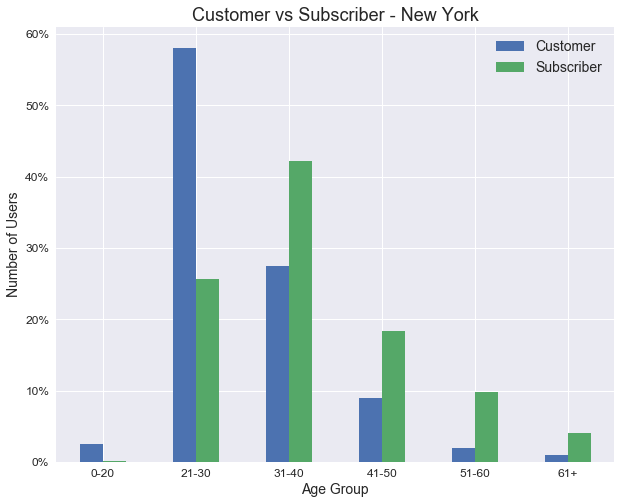

In [162]:
ny_usertype.unstack(0).plot(kind='bar', figsize=(10,8))
plt.legend(fontsize=14)
plt.title('Customer vs Subscriber - New York', fontsize=18)
plt.xlabel("Age Group", fontsize = 14)
plt.ylabel("Number of Users", fontsize = 14)
plt.gca().set_yticklabels(['{:.0f}%'.format(x*100) for x in plt.gca().get_yticks()], fontsize=12) 
plt.xticks(np.arange(6),('0-20', '21-30','31-40','41-50','51-60', '61+'), fontsize= 12, rotation=0)
plt.show()

In [160]:
#San Fran Customer Type
sf_total_riders = sf['usertype'].count()
print('total number of users in San Francisco is: {}'.format(ny_total_riders))

sf_usertype = sf.groupby('usertype')['age groups'].value_counts(normalize=True)

sf_usertype

total number of users in San Francisco is: 102979


usertype    age groups
Customer    21-30         0.427462
            31-40         0.347418
            41-50         0.128960
            51-60         0.051971
            0-20          0.031737
            61+           0.012452
Subscriber  31-40         0.380636
            21-30         0.328962
            41-50         0.168231
            51-60         0.086361
            61+           0.025187
            0-20          0.010622
Name: age groups, dtype: float64

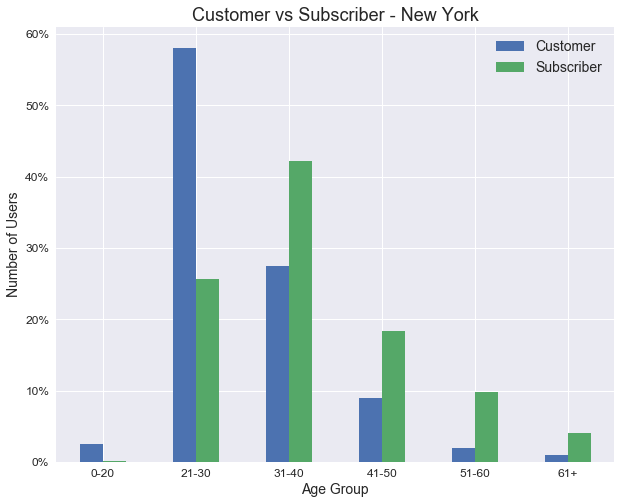

In [147]:
ny_usertype.unstack(0).plot(kind='bar', figsize=(10,8))
plt.legend(fontsize=14)
plt.title('Customer vs Subscriber - New York', fontsize=18)
plt.xlabel("Age Group", fontsize = 14)
plt.ylabel("Number of Users", fontsize = 14)
plt.gca().set_yticklabels(['{:.0f}%'.format(x*100) for x in plt.gca().get_yticks()], fontsize=12) 
plt.xticks(np.arange(6),('0-20', '21-30','31-40','41-50','51-60', '61+'), fontsize= 12, rotation=0)
plt.show()

### avg trip duration by age

In [26]:
#NewYork
ny_trip_duration = ny.groupby('age groups')['tripduration'].mean().reset_index()
# ny_trip_duration['ny tripduration'] = ny_trip_duration['tripduration'].map(lambda x: x/60)
ny_trip_duration


,age groups,tripduration
0,0-20,2100.879032
1,21-30,555.342254
2,31-40,480.955874
3,41-50,578.587639
4,51-60,594.433340
5,61+,452.158718


In [27]:
#SanFran
sf_trip_duration = sf.groupby('age groups')['tripduration'].mean().reset_index()
# sf_trip_duration['sf tripduration'] = sf_trip_duration['tripduration'].map(lambda x: x/60)
sf_trip_duration

,age groups,tripduration
0,0-20,1111.654102
1,21-30,775.451858
2,31-40,721.606895
3,41-50,748.127316
4,51-60,800.779979
5,61+,828.486324


In [28]:
trip_duration =sf_trip_duration.join(ny_trip_duration, lsuffix='_sf', rsuffix='_ny')
trip_duration['tripduration_sf'] = trip_duration['tripduration_sf'].map(lambda x: x/60)
trip_duration['tripduration_ny'] = trip_duration['tripduration_ny'].map(lambda x: x/60)

trip_duration

,age groups_sf,tripduration_sf,age groups_ny,tripduration_ny
0,0-20,18.527568,0-20,35.014651
1,21-30,12.924198,21-30,9.255704
2,31-40,12.026782,31-40,8.015931
3,41-50,12.468789,41-50,9.643127
4,51-60,13.346333,51-60,9.907222
5,61+,13.808105,61+,7.535979


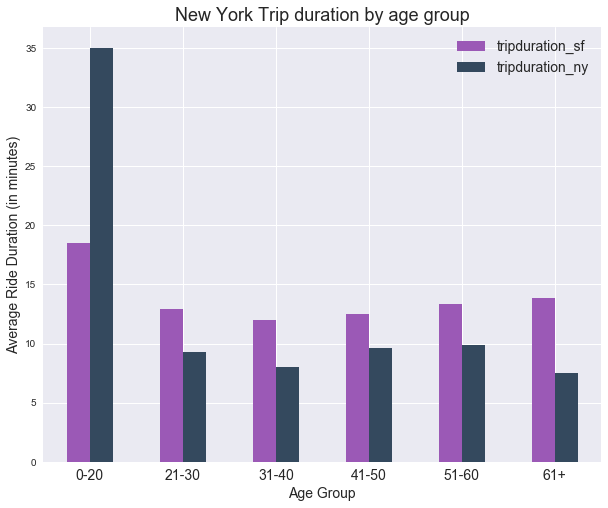

In [29]:
trip_duration.plot(kind='bar', color = plot_colors, figsize=(10,8))
plt.legend(fontsize=14)
plt.title('New York Trip duration by age group', fontsize=18)
plt.xlabel("Age Group", fontsize = 14)
plt.ylabel("Average Ride Duration (in minutes)", fontsize = 14)
plt.xticks(np.arange(6),('0-20', '21-30','31-40','41-50','51-60', '61+'), fontsize= 14, rotation=0)
plt.show()

### popular stations by age

In [212]:
ny_drop = ny.dropna(axis=0)
start_station = ny_drop.groupby('age groups')['start station name'].value_counts()
start_station = start_station.groupby('age groups').nlargest(5)
# start_station.plot(kind='bar', stacked=True, figsize=(10,8))

In [213]:
start_station = pd.DataFrame(start_station)
start_station.index.names=['age group', 'x', 'start station']
start_station.reset_index(inplace=True)
start_station= start_station[['age group', 'start station', 'start station name']]
start_station

,age group,start station,start station name
0,0-20,Hilltop,28
1,0-20,Washington St,14
2,0-20,Paulus Hook,7
3,0-20,Exchange Place,6
4,0-20,Garfield Ave Station,6
5,21-30,Grove St PATH,2499
6,21-30,Exchange Place,1559
7,21-30,Newport PATH,1336
8,21-30,Sip Ave,1314
9,21-30,Harborside,1178


### bikes around the world

In [214]:
url = 'https://bikeshare-research.org/api/v1/categories/base/fields/country'
response = requests.get(url).json()

In [215]:
df= pd.DataFrame([x for x in response])
country_count = df.groupby('country').count().reset_index()

In [216]:
country_count = country_count.sort_values(by=['bssid'])
top5 = country_count.nlargest(5, 'bssid')
top5

,country,bssid
41,United States,89
14,France,40
36,Spain,13
40,United Kingdom,9
8,China,7


In [ ]:
# cool live map of bikes in use
# http://bikes.oobrien.com/#zoom=3&lon=-16.1133&lat=37.9504